## Sarah Bowman

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
from scipy import optimize

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: overflow encountered in double_scalars


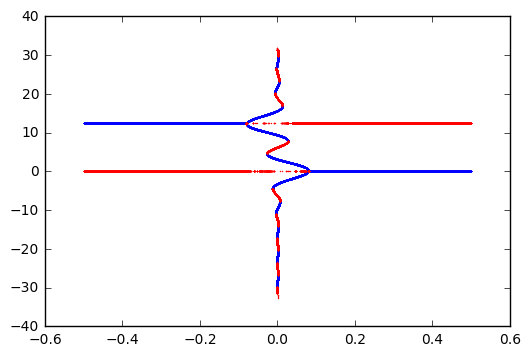

In [10]:
def func(mu,x):
    return np.sin(x) + mu*x*(x-4*np.pi)
def func2(x,mu):
    return np.sin(x) + mu*x*(x-4*np.pi)
def funcD(x, mu):
    return np.cos(x) + mu*(x-4*np.pi) + mu*x
mu = np.linspace(-.5,.5, 10000)
x = np.linspace(-np.pi*10.,np.pi*10.,10000)
stable = []
unstable = []
for i in x:
    res = optimize.fsolve(func,[-.5,5], args = (i),factor=500)
    for j in res:
        if 1/np.abs(func(j,i))>10**6:
            deriv = funcD(i,j)
            if deriv < 0 :
                stable.append([j,i])
            if deriv > 0: 
                unstable.append([j,i])
for i in mu:
    res = optimize.fsolve(func2,[-np.pi*10,np.pi*10], args = (i),factor=500)
    for j in res:
        if 1/np.abs(func2(j,i))>10**6:
            deriv = funcD(j,i)
            if deriv < 0 :
                stable.append([i,j])
            if deriv > 0: 
                unstable.append([i,j])
st = np.array(stable)
unst = np.array(unstable)
plt.plot(st[:,0], st[:,1],".", ms = 1)
plt.plot(unst[:,0], unst[:,1],".", ms = 1, color = 'red')